In [1]:
import os
import os.path as osp
import sys
sys.path.insert(0, osp.dirname(osp.abspath(".")))

import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import torch
from torch.utils.data import DataLoader
from torchvision import transforms

from data.transform import RandomErasing
from data.datasets import get_dataset_cls
from data.sampler import BalancedBatchSampler

## Define preprocessing piepline

In [2]:
tr_transform = transforms.Compose([
    transforms.Resize((256, 128)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.Pad(10),
    transforms.RandomCrop((256, 128)),
    transforms.ColorJitter(brightness=0.3, contrast=0.1, saturation=0.1, hue=0),
    transforms.ToTensor(),
    # For visualization reason
    # ==============================================
    #transforms.Normalize(mean=[0.485, 0.456, 0.406],
    #                    std=[0.229, 0.224, 0.225]),
    RandomErasing(probability=0.3),
    ])
te_transform = transforms.Compose([
    transforms.Resize((256, 128)),
    transforms.ToTensor(),
    # For visualization reason
    # ==============================================
    #transforms.Normalize(mean=[0.485, 0.456, 0.406],
    #                   std=[0.229, 0.224, 0.225])
    ])

## Load Dataset

In [3]:
dataset_cls = get_dataset_cls('market1501')
dataset = dataset_cls(root="../download/", mode="all", transform=tr_transform)

print(dataset)

[Market1501]
| Source | Images | Pids | Camids |
| train  | 32217  | 1502 |   6    |
| query  |  3368  | 750  |   6    |
| gallery| 15913  | 751  |   6    |



## Define Balance Sampler

In [4]:
labels = [ sample[1] for sample in dataset.data ]
sampler = BalancedBatchSampler(labels, P=4, K=4)
dataloader = DataLoader(dataset, batch_sampler=sampler)

## Visualize Dataset

In [5]:
tensor_to_pil = transforms.ToPILImage()

In [6]:
imgs, labels, camids, _ = next(iter(dataloader))

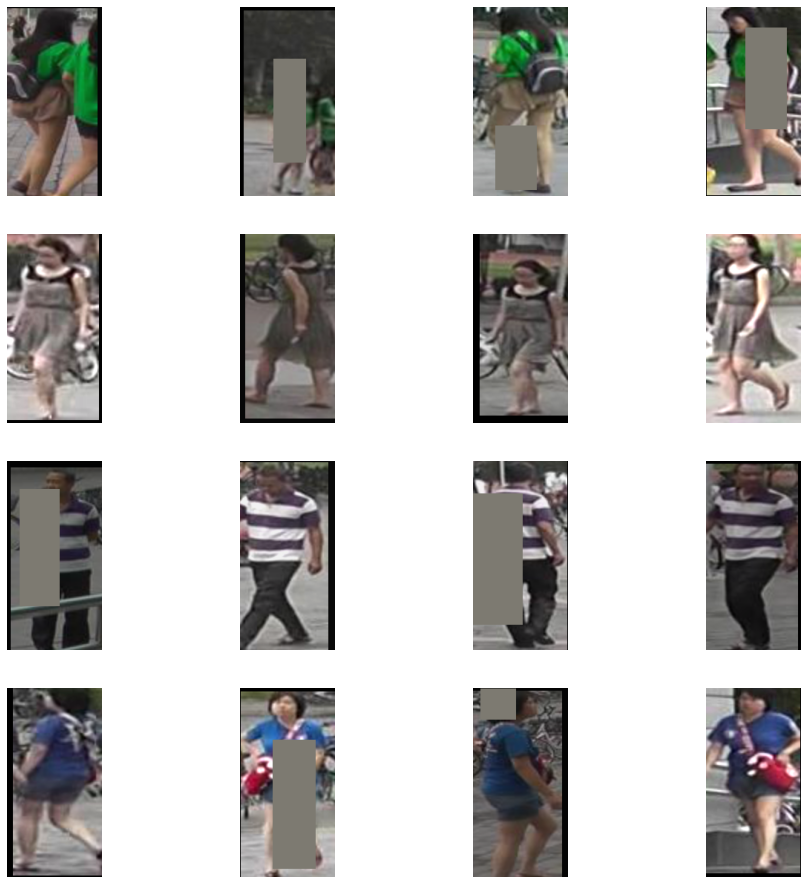

In [7]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))

for i in range(4):
    for j in range(4):
        pil_img = tensor_to_pil(imgs[i*4+j])
        img = np.array(pil_img)
        axes[i][j].imshow(img)
        axes[i][j].set_axis_off()